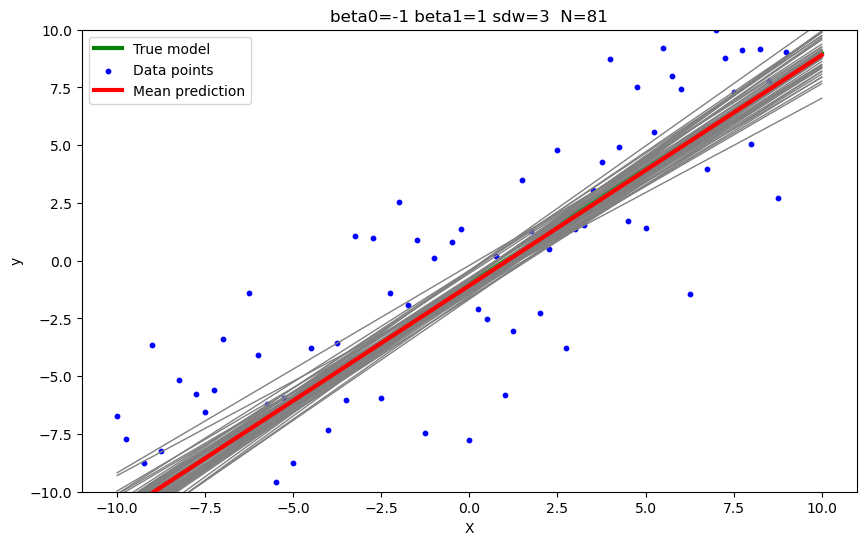

In [2]:
# "INFOF422 Statistical foundations of machine learning" course
# Python translation of R package gbcode 
# Author: G. Bontempi

#################################################################
# bv.py						                #
#################################################################
# Dataset D_N={x_i,y_i} :			
#	  y_i = beta_0 + beta_1x_i + w_i			#
#   with known  beta_0  and beta_1 and known w=Normal(0, sigma) 	#
#   						
# Visualization of bias and variance of the least square estimate 	#
#################################################################

import numpy as np
import matplotlib.pyplot as plt

# preliminary
# ============
np.random.seed(0)
X = np.arange(-10, 10.25, 0.25)  # fixed xi
beta0 = -1
beta1 = 1
sd_w = 3
N = len(X)
R = 50  # number of MC trials

beta_hat_1 = np.zeros(R)
beta_hat_0 = np.zeros(R)
var_hat_w = np.zeros(R)
Y_hat = np.empty((R, N))
Y_hat.fill(np.nan)
x_bar = np.mean(X)
S_xx = np.sum((X - x_bar) ** 2)

plt.figure(figsize=(10, 6))

for r in range(R):
    Y = beta0 + beta1 * X + np.random.normal(scale=sd_w, size=N)  # data generation
    y_bar = np.mean(Y)
    S_xy = np.sum((X - x_bar) * Y)
    
    beta_hat_1[r] = S_xy / S_xx
    beta_hat_0[r] = y_bar - beta_hat_1[r] * x_bar
    
    Y_hat[r, :] = beta_hat_0[r] + beta_hat_1[r] * X
    var_hat_w[r] = np.sum((Y - Y_hat[r, :]) ** 2) / (N - 2)
    
   

# After all trials
plt.clf()
plt.plot(X, beta0 + beta1 * X, color='green',
         label='True model', linewidth=3)
plt.scatter(X, Y, color='blue', s=10, label='Data points')

plt.plot(X, Y_hat.T, color='grey', linewidth=1)
plt.plot(X, np.mean(Y_hat, axis=0), color='red', linewidth=3, label='Mean prediction')
plt.title(f"beta0={beta0} beta1={beta1} sdw={sd_w}  N={N}")
plt.ylim(-10, 10)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [22]:
## bv_mult.py
##"INFOF422 Statistical foundations of machine learning" course
# Python translation of R package gbcode 
# Author: G. Bontempi

import numpy as np
import matplotlib.pyplot as plt



n = 4  # number of input variables
p = n + 1
N = 100  # number of training data points
R = 10000
sd_w = 5

# Generate N x n array of uniform random variables between -20 and 20
X = np.random.uniform(-20, 20, size=(N, n))

# Add a column of ones for the intercept term
X = np.column_stack((np.ones(N), X))

# Randomly sample integers between 1 and 10 for beta
beta = np.random.randint(1, 11, size=p)  # test with different values

# Initialize arrays to store results
beta_hat = np.zeros((p, R))
var_hat_w = np.zeros(R)
Y_hat = np.empty((R, N))
Y_hat[:] = np.nan

# Precompute the pseudo-inverse of X^T X
XTX_pinv = np.linalg.pinv(X.T @ X)

for r in range(R):
    # Generate Y with noise
    noise = np.random.normal(0, sd_w, size=N)
    Y = X @ beta + noise

    # Estimate beta_hat using pseudo-inverse
    beta_hat[:, r] = XTX_pinv @ X.T @ Y

    # Predict Y_hat
    Y_hat[r, :] = X @ beta_hat[:, r]

    # Calculate residuals
    e = Y - Y_hat[r, :]

    # Estimate variance of w
    var_hat_w[r] = (e @ e) / (N - p)

# Plot histogram of var_hat_w
plt.hist(var_hat_w, bins='auto')
plt.title(f"Distribution of var_hat.w: var w= {sd_w**2}")
plt.xlabel("var_hat.w")
plt.ylabel("Frequency")
plt.show()

# Plot histograms for each beta_hat
for i in range(p):
    fig, ax = plt.subplots() 
    ax.hist(beta_hat[i, :], bins='auto')
    plt.title(f"Distribution of beta_hat.{i+1}: beta {i+1}= {beta[i]}")
    plt.xlabel(f"beta_hat.{i+1}")
    plt.ylabel("Frequency")
    display(fig)
    clear_output(wait=True)  # Clear the output
    
    plt.close(fig)  # Close the figure
    time.sleep(0.1)
    input(" ")

# Test unbiasedness and compare variancesfor a set of points
for i in range(5):
    # Calculate f(x_i)
    f_x_i = X[i, :] @ beta

    # Calculate mean of Y_hat for ith data point
    mean_Y_hat = np.mean(Y_hat[:, i])

    print(f"i= {i+1} E[yhat_i]= {mean_Y_hat} f(x_i)= {f_x_i}")

    # Calculate prediction variance analytically
    prediction_variance = (sd_w**2) * (X[i, :] @ XTX_pinv @ X[i, :].T)

    # Calculate empirical variance from Y_hat
    mc_value = np.var(Y_hat[:, i], ddof=1)

    print(f"i= {i+1} prediction variance= {prediction_variance} MC value= {mc_value}\n")


 c
i= 1 E[yhat_i]= 281.1091850670266 f(x_i)= 281.1198348037139
i= 1 prediction variance= 1.4195366773500644 MC value= 1.3656716992514484

i= 2 E[yhat_i]= -71.10299853984623 f(x_i)= -71.09408642250592
i= 2 prediction variance= 1.391069402324294 MC value= 1.390505447391103

i= 3 E[yhat_i]= -139.21898799722064 f(x_i)= -139.2186886092533
i= 3 prediction variance= 0.9031218083508038 MC value= 0.8969647028231951

i= 4 E[yhat_i]= -98.94963558713614 f(x_i)= -98.95204601613597
i= 4 prediction variance= 0.9682222461042589 MC value= 0.9758484128620228

i= 5 E[yhat_i]= 49.86422238138011 f(x_i)= 49.86496950139686
i= 5 prediction variance= 0.9989426361302121 MC value= 1.0182871099056945



In [23]:
# "INFOF422 Statistical foundations of machine learning" course
# Python translation of the R package gbcode 
# Author: G. Bontempi

from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import pinv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets as widgets
import matplotlib
import time 

np.random.seed(0)

n = 3  # number of input variables
p = n + 1
p_max = 25
N = 35  # number of training data
x = np.sort(np.random.uniform(-1, 1, N))

X = np.ones((N, 1))
for j in range(1, p_max + 1):
    X = np.hstack((X, x.reshape(-1, 1) ** j))

xts = np.arange(-1, 1.01, 0.01)
Xts = np.ones((len(xts), 1))
for j in range(1, p_max + 1):
    Xts = np.hstack((Xts, xts.reshape(-1, 1) ** j))

beta = np.hstack(([1], np.arange(1, n + 1))).reshape(-1, 1)

sd_w = 0.5

f = X[:, :p] @ beta
Y = f.flatten() + np.random.normal(0, sd_w, N)

fts = Xts[:, :p] @ beta
Yts = fts.flatten() + np.random.normal(0, sd_w, len(fts))

R_emp = []
MISE = []
FPE = []
PSE = []
no_par = []
plt.figure()
for i in range(2, min(p_max, N - 1) + 1):
    
    XX = X[:, :i]
    invX = pinv(XX.T @ XX)
    beta_hat = invX @ XX.T @ Y
    Y_hat = XX @ beta_hat

    XXts = Xts[:, :i]
    Y_hats = XXts @ beta_hat
    no_par.append(i)

    e = Y - Y_hat
    R_emp.append((e.T @ e) / N)
    sde2hat = (e.T @ e) / (N - i)
    
    fig, ax = plt.subplots(figsize=(12, 10))  # Create figure and axes

    ax.plot(xts, fts, label='True function', color='green', linewidth=3)
    ax.scatter(x, Y, label='Data Points', color='blue')
    ax.plot(xts, Y_hats, label='Fitted function', color='red')
    plt.ylim(min(Y), max(Y))
    ax.legend()
    
    e_ts = Yts - Y_hats
    MISE.append((e_ts.T @ e_ts) / N)
    FPE.append(((1 + i / N) / (1 - i / N)) * (e.T @ e) / N)
    PSE.append((e.T @ e) / N + 2 * sde2hat * i / N)
    
    plt.title(f"degree={i-1}; MISE_emp={R_emp[i-2]:.4f}; FPE={FPE[i-2]:.2f}; PSE={PSE[i-2]:.3f}")
    
    display(fig)
    clear_output(wait=True)  # Clear the output
    
    plt.close(fig)  # Close the figure
    time.sleep(0.1)
    input(" ")
    

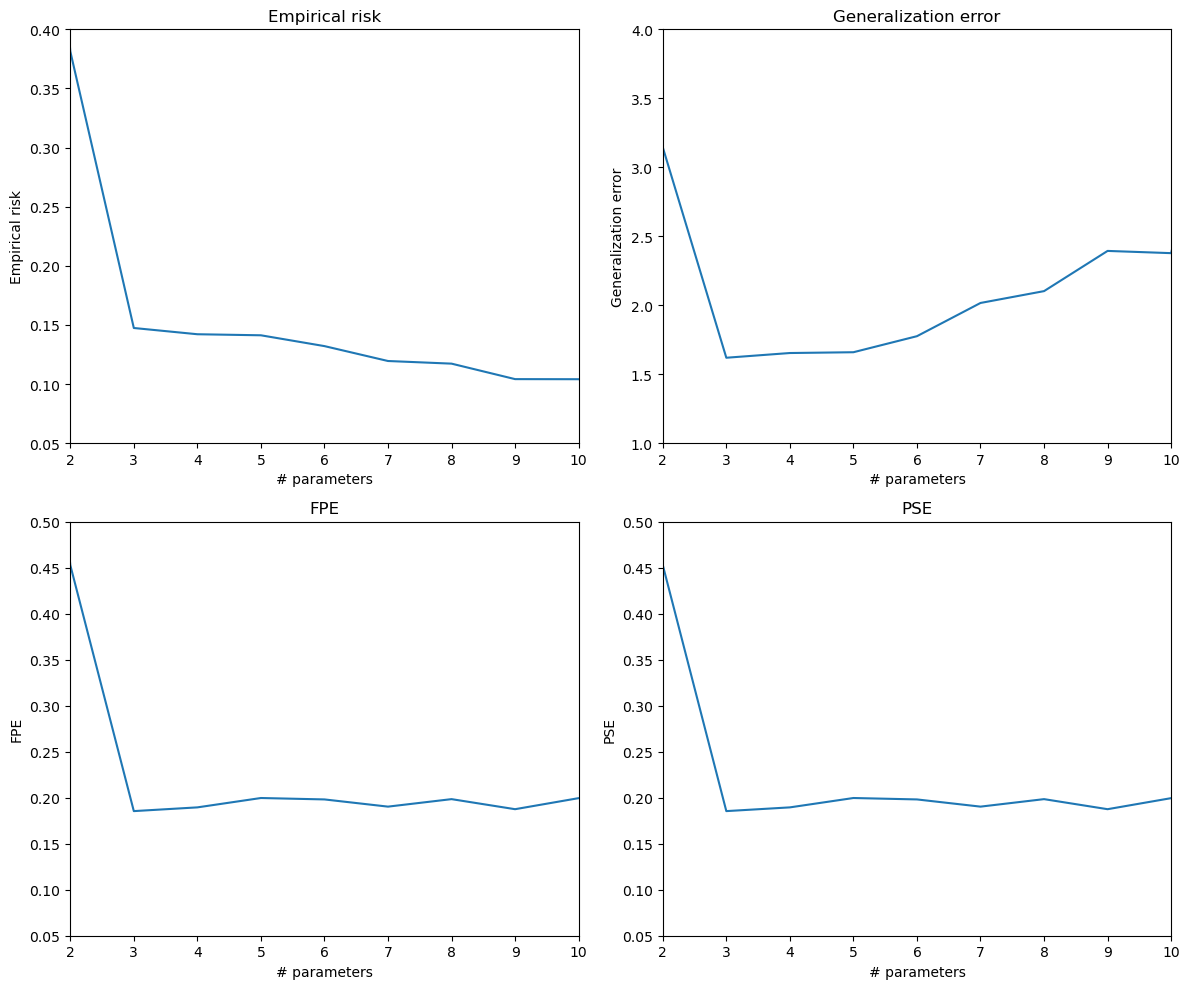

which.min(R.emp)=24
which.min(MISE)=3
which.min(FPE)=11
which.min(PSE)=11


In [6]:
plt.ioff()  # Disable interactive mode

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].plot(np.array(no_par) - 1, R_emp, label='Empirical risk')
axs[0, 0].set_xlabel("# parameters")
axs[0, 0].set_ylabel("Empirical risk")
axs[0, 0].set_title("Empirical risk")
axs[0, 0].set_xlim(2, 10)
axs[0, 0].set_ylim(0.05, 0.4)

axs[0, 1].plot(np.array(no_par) - 1, MISE, label='Generalization error')
axs[0, 1].set_xlabel("# parameters")
axs[0, 1].set_ylabel("Generalization error")
axs[0, 1].set_title("Generalization error")
axs[0, 1].set_xlim(2, 10)
axs[0, 1].set_ylim(1, 4)

axs[1, 0].plot(np.array(no_par) - 1, FPE, label='FPE')
axs[1, 0].set_xlabel("# parameters")
axs[1, 0].set_ylabel("FPE")
axs[1, 0].set_title("FPE")
axs[1, 0].set_xlim(2, 10)
axs[1, 0].set_ylim(0.05, 0.5)

axs[1, 1].plot(np.array(no_par) - 1, PSE, label='PSE')
axs[1, 1].set_xlabel("# parameters")
axs[1, 1].set_ylabel("PSE")
axs[1, 1].set_title("PSE")
axs[1, 1].set_xlim(2, 10)
axs[1, 1].set_ylim(0.05, 0.5)

plt.tight_layout()
plt.show()
plt.close()

print(f"which.min(R.emp)={np.argmin(R_emp) + 1}")
print(f"which.min(MISE)={np.argmin(MISE) + 1}")
print(f"which.min(FPE)={np.argmin(FPE) + 1}")
print(f"which.min(PSE)={np.argmin(PSE) + 1}")


In [18]:
for i in np.arange(10):
    
    xts=np.arange(100)
    fts=pow(xts,i)
    fig, ax = plt.subplots()  # Create figure and axes

    #ax.plot(xts, fts, label='True function', color='green', linewidth=3)
    #ax.scatter(xts, fts, label='Data Points', color='blue')
    #ax.plot(xts, fts, label='Fitted function', color='red')
    #ax.ylim(min(Y), max(Y))
    ax.hist(fts, bins='auto')
    ax.legend()
    
     
    plt.title(f"degree={i-1}; MISE_emp={R_emp[i-2]:.4f}; FPE={FPE[i-2]:.2f}; PSE={PSE[i-2]:.3f}")
    
    display(fig)
    clear_output(wait=True)  # Clear the output
    
    plt.close(fig)  # Close the figure
    time.sleep(0.1)
    input(" ")
    

KeyboardInterrupt: Interrupted by user